In [1]:
# Dependencies
import os 
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine

import missingno as msno 
import warnings
warnings.filterwarnings("ignore")
import pymongo
import datetime
from webdriver_manager.chrome import ChromeDriverManager
import ssl
import certifi
from urllib import request as req
import requests
from sqlalchemy import create_engine
import json
from pymongo import MongoClient 

# Reading in Files
true_df = pd.read_csv("datasource/primary_data_source/True.csv", encoding='utf-8')
fake_df = pd.read_csv("datasource/primary_data_source/Fake.csv", encoding='utf-8')
# https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

#true_df = pd.read_csv("datasource/primary_data_source/True.csv")
#fake_df = pd.read_csv("datasource/primary_data_source/Fake.csv")

In [2]:
# Checking true_df Dataframe after dropping index
true_df=true_df.reset_index(drop=True)
true_df.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
# Checking fake_df Dataframe after dropping index
fake_df=fake_df.reset_index(drop=True)
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Inserting Column for status and ID for fake news  
# fake = value of 1
fake_df['status'] = 1

In [5]:
# Inserting Column for status and for fake news  
# true = value of 0
true_df['status'] = 0

In [6]:
#drop null values from true_df and fake_df
true_df.dropna(inplace=True)
fake_df.dropna(inplace=True)

In [7]:
# Checking fake_df Dataframe
fake_df.head()

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [8]:
# Checking true_df Dataframe
true_df.head()

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


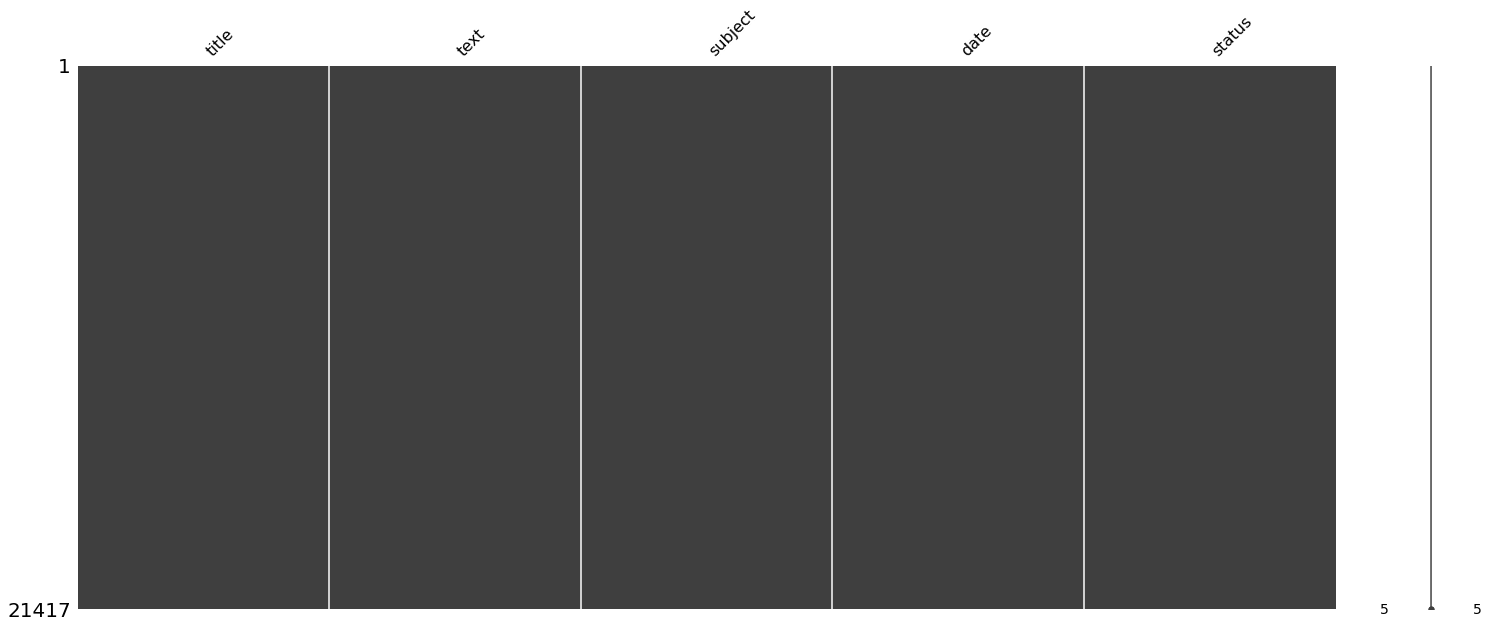

In [9]:
msno.matrix(true_df)

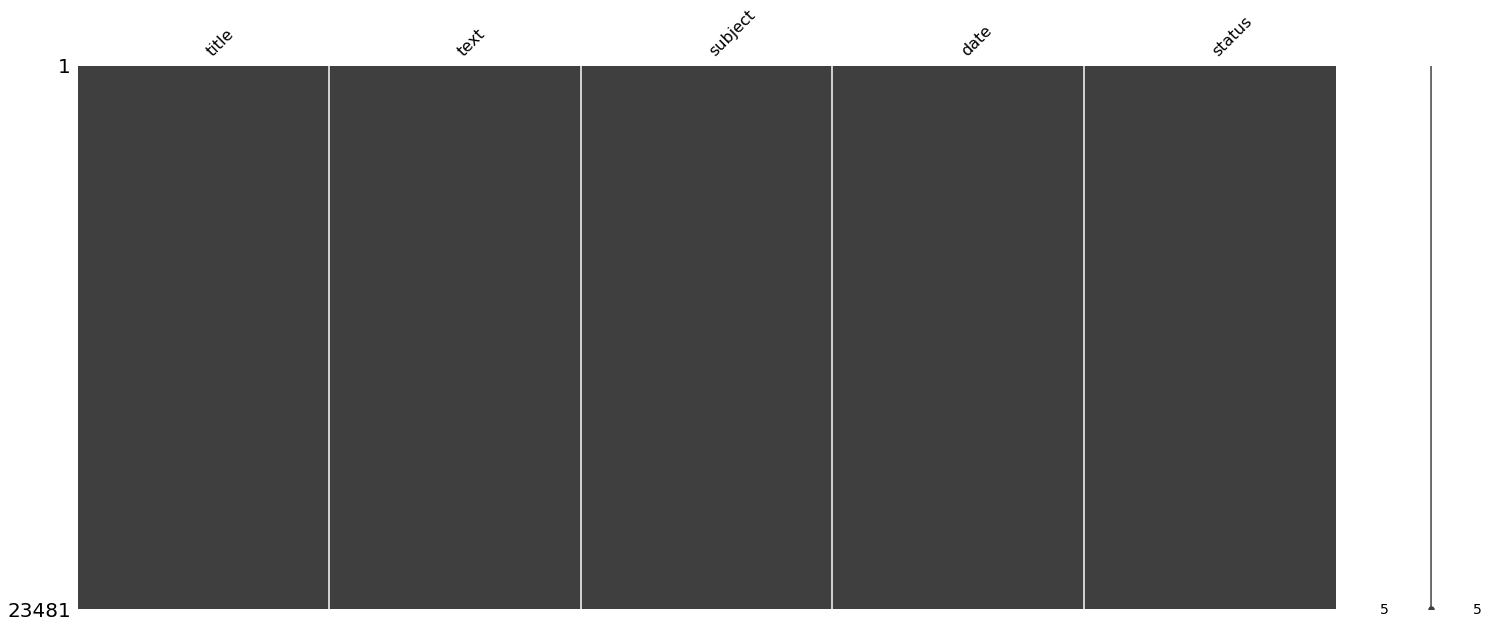

In [10]:
msno.matrix(fake_df)

In [11]:
clean_fake_df=fake_df
clean_true_df=true_df

In [12]:
clean_fake_df.to_csv('datasource/clean_data_source/clean_fake_full.csv', index=False)
clean_true_df.to_csv('datasource/clean_data_source/clean_true_full.csv', index=False)

In [13]:
partial_fake_clean_df=clean_fake_df.head(4500)
partial_true_clean_df=clean_true_df.head(4500)
combined_partial_df=pd.concat([partial_fake_clean_df, partial_true_clean_df])

In [14]:
# Checking row with issues in data frame
combined_partial_df.iloc[1050]

title      \r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fell...
text       At this point, every Republican who refuses to...
subject                                                 News
date                                           June 22, 2017
status                                                     1
Name: 1050, dtype: object

In [15]:
# creates the a csv to load into postgres for heroku with 4500 fake and 4500 true news stories
combined_partial_df.to_csv('datasource/clean_data_source/combined_partial.csv', index=False)
combined_partial_df.to_csv('datasource/clean_data_source/combined_partial.txt', sep='|', index=False)

In [16]:
# The below lines are just part of trouble shooting and seeing if we could get the data loaded
fake2_df = pd.read_csv('datasource/clean_data_source/clean_fake_full.csv').dropna()
true2_df = pd.read_csv('datasource/clean_data_source/clean_true_full.csv').dropna()

In [17]:
partial_fake_clean_df2=fake2_df.head(1000)
partial_true_clean_df2=true2_df.head(1000)

In [18]:
combined_partial_df2=pd.concat([partial_fake_clean_df2, partial_true_clean_df2])

In [19]:
combined_partial_df2.to_csv('datasource/clean_data_source/combined_partial3.txt', sep='|', index=False)